In [331]:
df = pd.read_csv("D:\Data Case studies\Car price prediction (Multi linear Regression)\CarPrice_Assignment.csv")
df.head()

<IPython.core.display.Javascript object>

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [41]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Checking for Null Values\n')

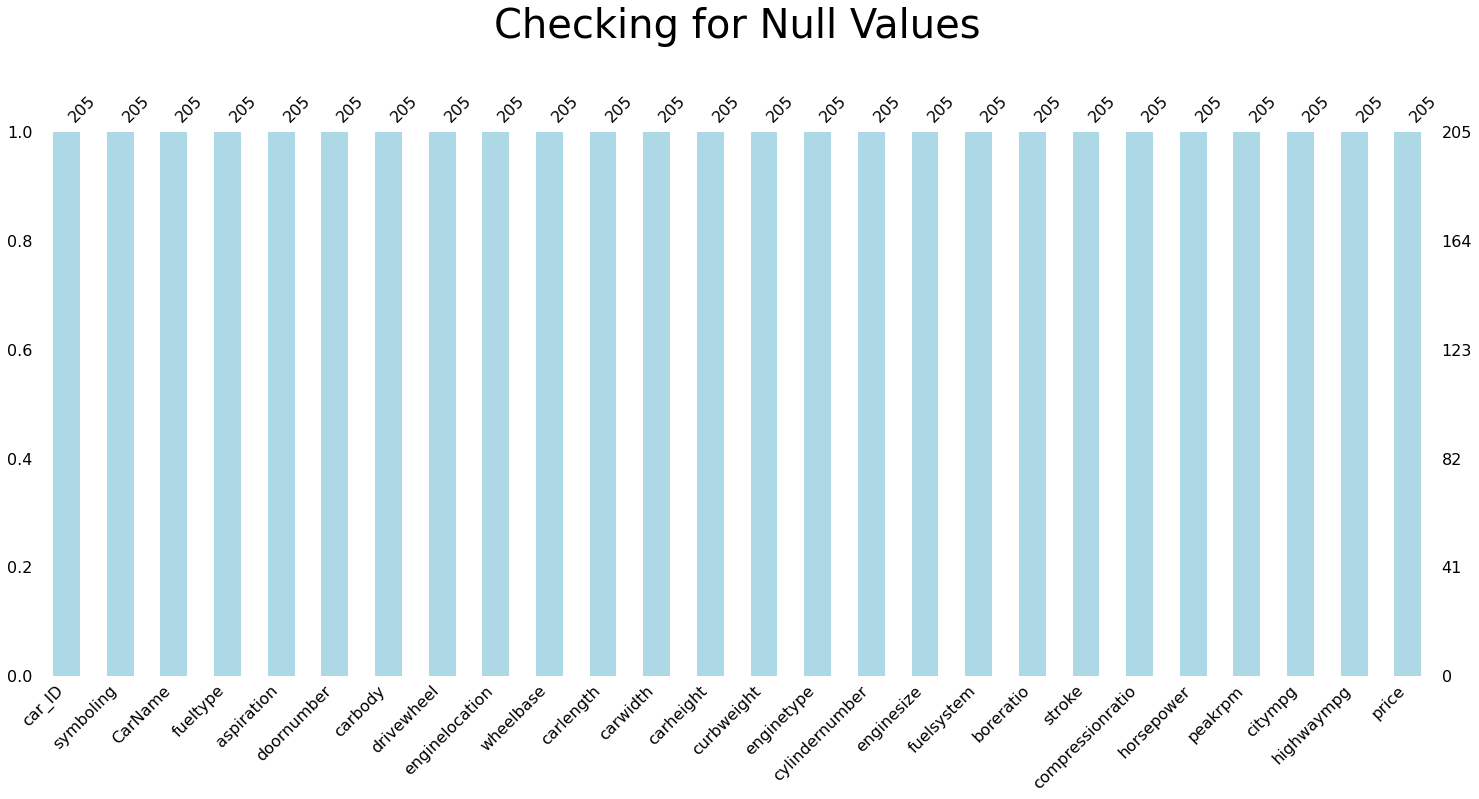

In [42]:
import missingno as msn
msn.bar(df, color='lightblue')
plt.title('Checking for Null Values\n', fontsize = 40)

<IPython.core.display.Javascript object>

<AxesSubplot: >

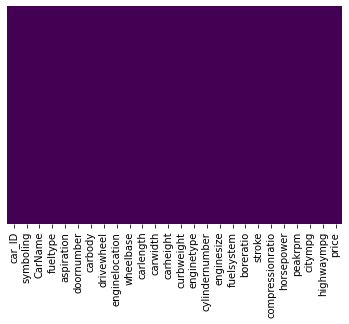

In [43]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [45]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [46]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

### So, the average price is 13276.71
### Min = 5118
### Max = 45400

In [47]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot: >

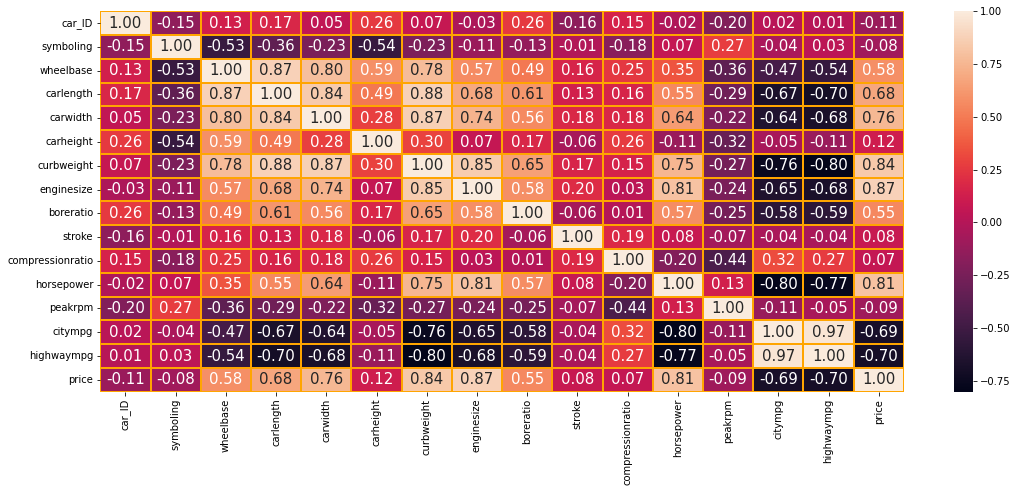

In [48]:
plt.figure(figsize = (18, 7))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')

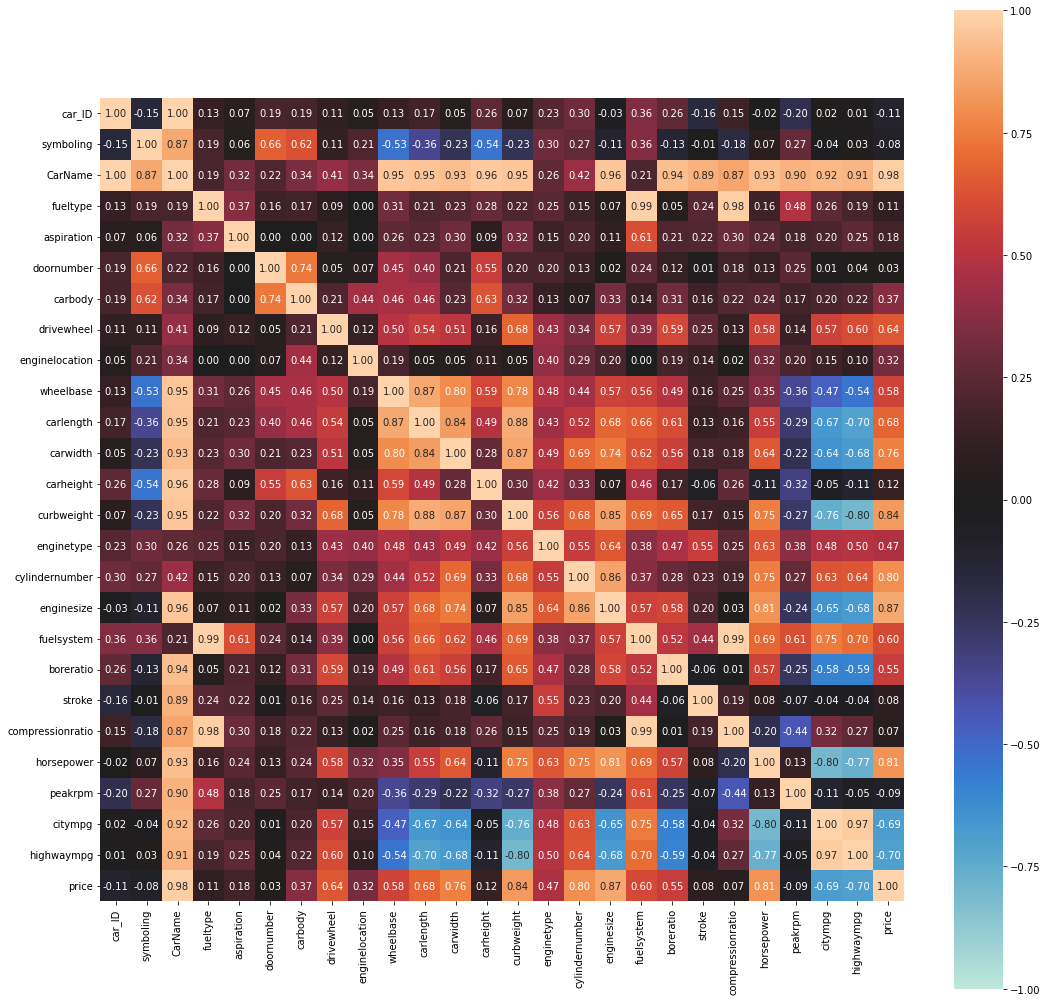

<IPython.core.display.Javascript object>

In [49]:
# displaying correlations between categorical variables as well with dython which was not possible above

from dython.nominal import associations

associations(df, figsize = (18, 18))
plt.show()

## Univariate Analysis

In [50]:
num_cols = df.select_dtypes(exclude = 'object')
cat_cols = df.select_dtypes(include = 'object')

In [51]:
num_cols.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [52]:
cat_cols.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

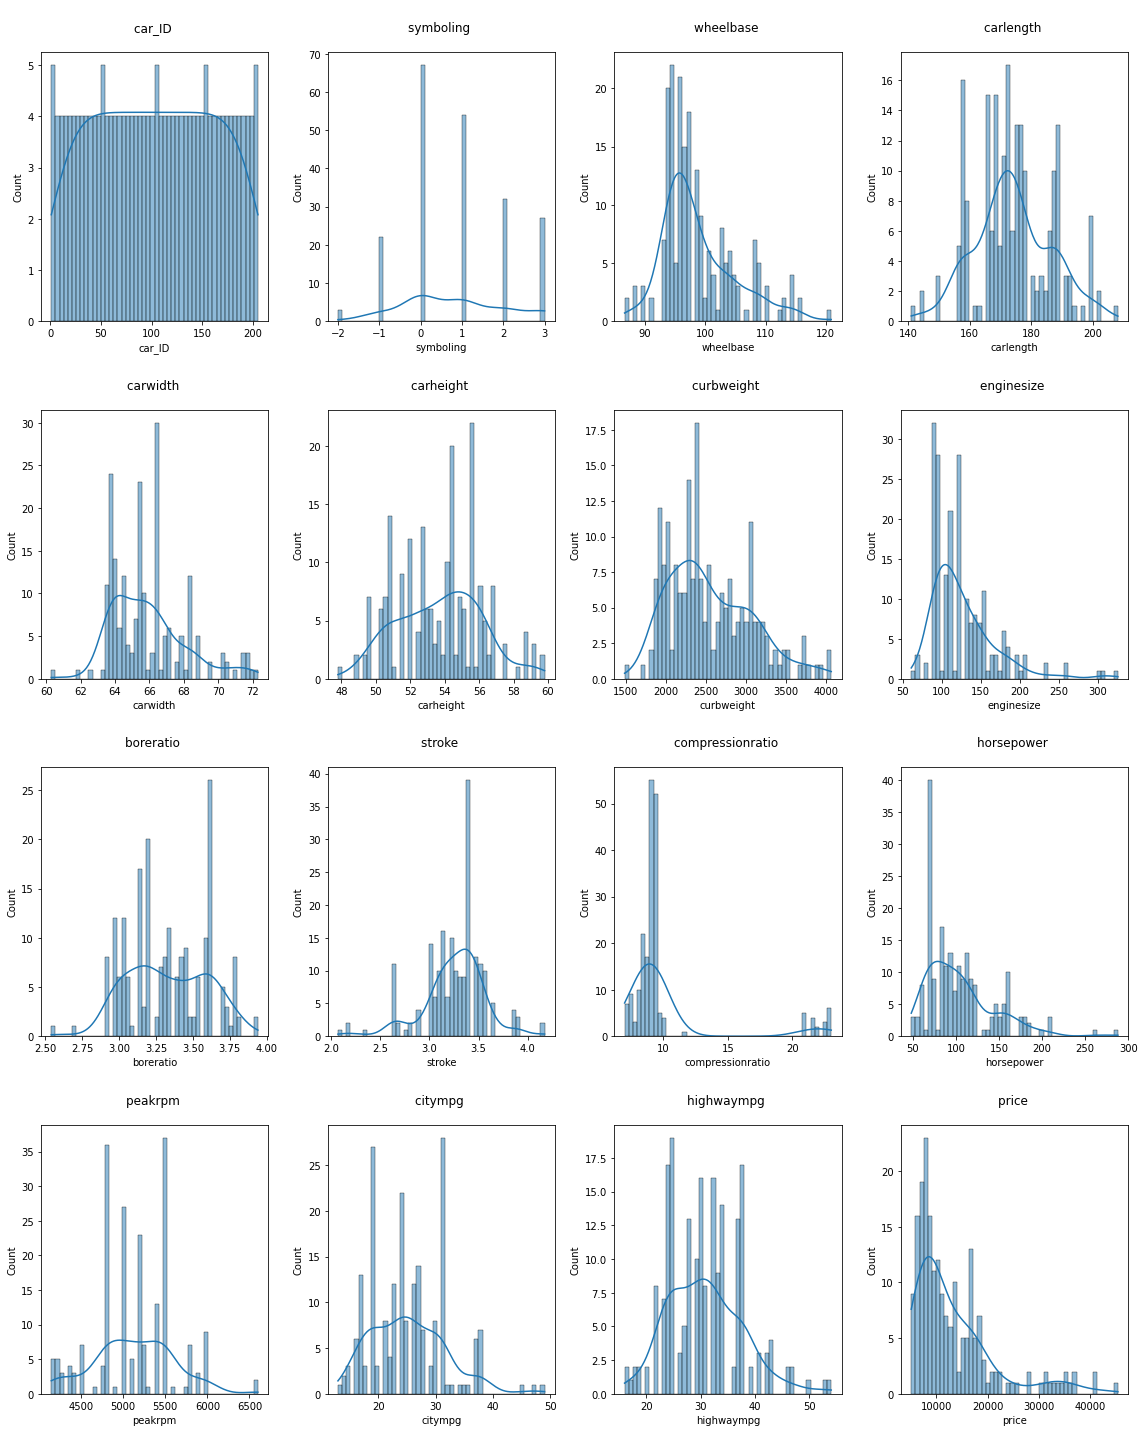

In [53]:
# visualizing num_cols
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber  = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.histplot(x = cols[i], data = df, ax = ax, kde=True, bins = 50)
        plt.title(f"\n{cols[i]} \n")
        
        plotnumber += 1
plt.tight_layout()
        
        

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

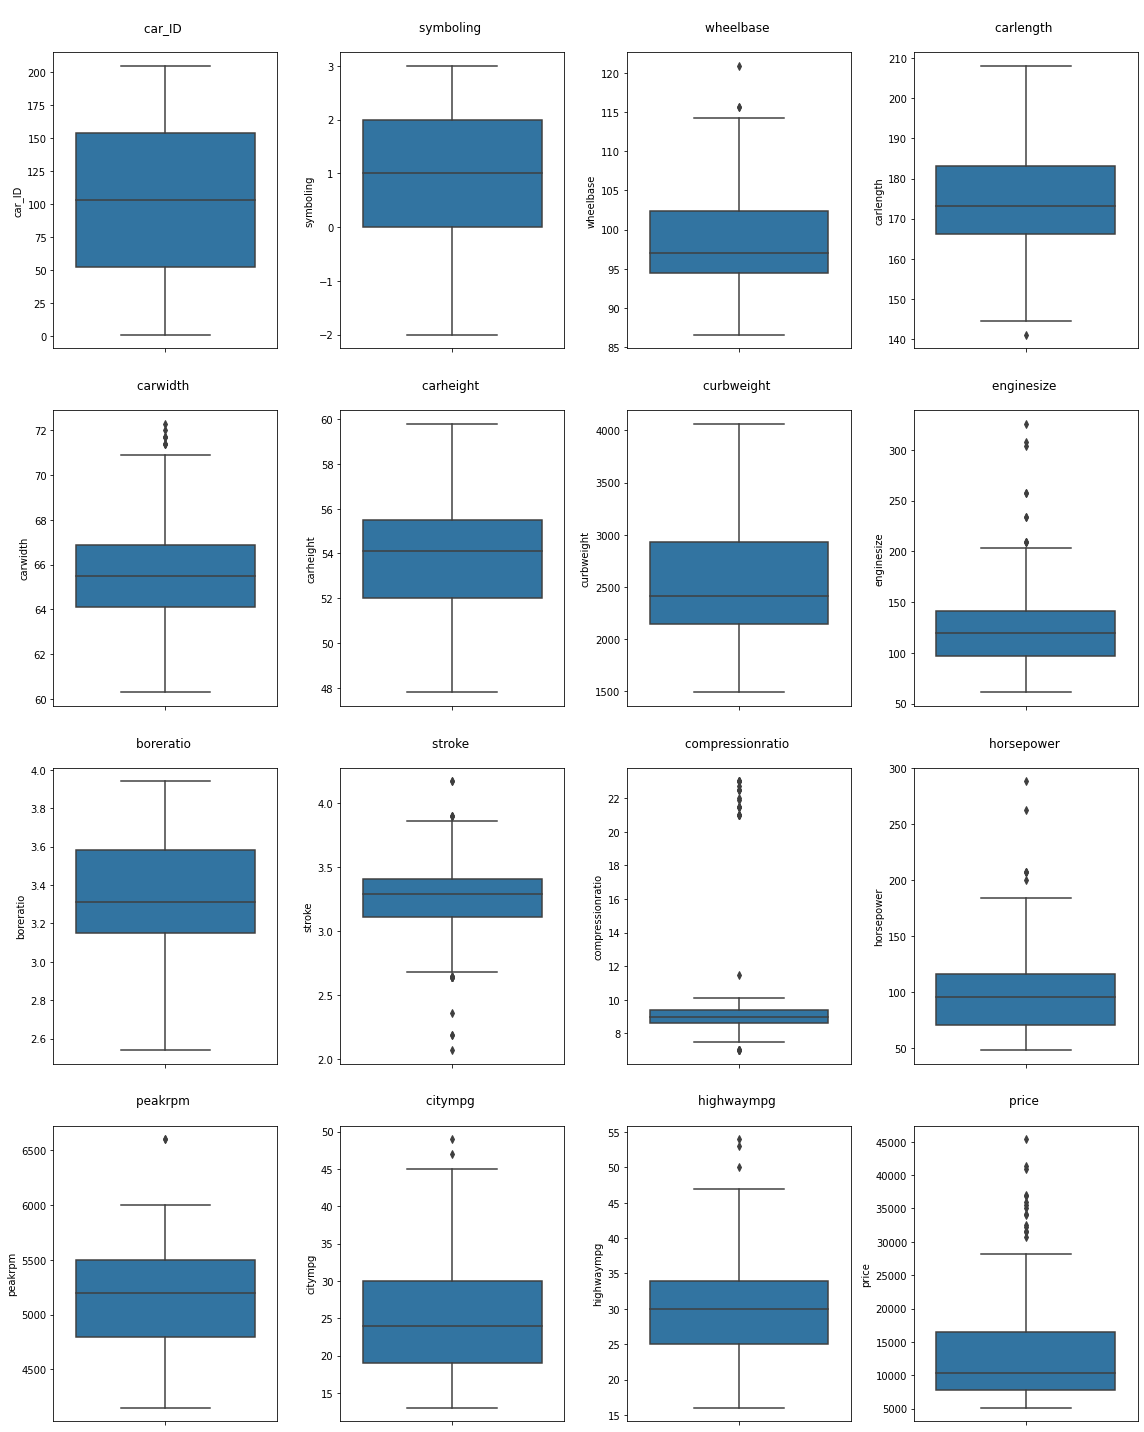

In [54]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber  = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(y = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n")
        
        plotnumber += 1
plt.tight_layout()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

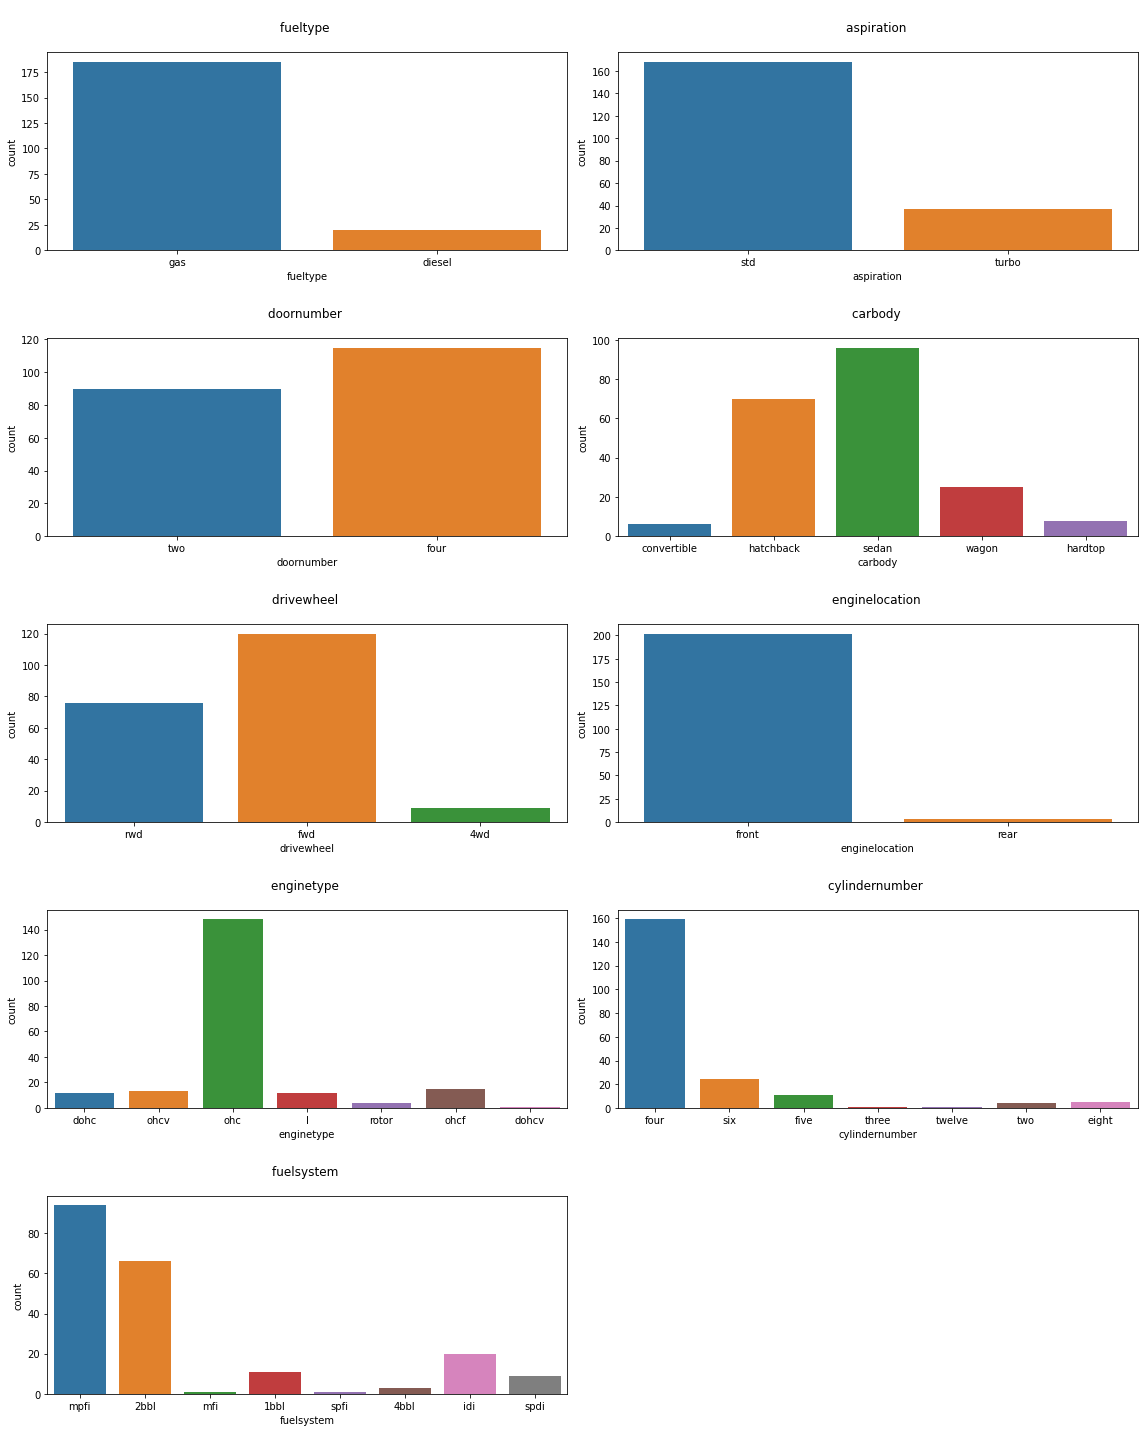

In [55]:
# visualizing categorical variables

cols = cat_cols.columns

plt.figure(figsize = (16, 20))
plotnumber  = 1

for i in range(1, len(cols)): # 1 is put here, so, to exclude CarName
    if plotnumber <= 16:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n")
        
        plotnumber += 1
plt.tight_layout()

<IPython.core.display.Javascript object>

([<matplotlib.patches.Wedge at 0x1eee94d4280>,
 [Text(-1.048736003975903, 0.3318927446701041, 'gas'),
  Text(1.048735972901857, -0.33189284285985376, 'diesel')],
 [Text(-0.5720378203504926, 0.18103240618369312, '90.2%'),
  Text(0.5720378034010128, -0.1810324597417384, '9.8%')])

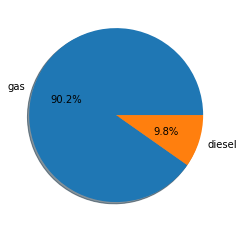

In [85]:
# How many prefer fuel types

labels = df['fueltype'].unique()
sizes = df['fueltype'].value_counts()

plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True)

In [78]:
fueltype = df['fueltype'].value_counts().reset_index()
fueltype.columns = ['fueltype', 'value_counts']
fig = px.pie(fueltype, names = 'fueltype', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [94]:
aspirations  = df['aspiration'].value_counts().reset_index()
aspirations.columns = ['aspirations', 'value_counts']

fig = px.pie(aspirations, names = 'aspirations', values = 'value_counts', color_discrete_sequence = 
             px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
doornumber = df['doornumber'].value_counts().reset_index()
doornumber.columns = ['doornumber', 'value_counts']

fig = px.pie(doornumber, names = 'doornumber', values = 'value_counts', color_discrete_sequence = 
             px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
carbody = df['carbody'].value_counts().reset_index()
carbody.columns = ['carbody', 'value_counts']

fig = px.pie(carbody, names = 'carbody', values = 'value_counts', color_discrete_sequence = 
      px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [99]:
drivewheel = df['drivewheel'].value_counts().reset_index()
drivewheel.columns = ['drivewheel', 'value_counts']

fig = px.pie(drivewheel, names = 'drivewheel', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [104]:
enginelocation = df['enginelocation'].value_counts().reset_index()
enginelocation.columns = ['enginelocation', 'value_counts']

fig = px.pie(enginelocation, names = 'enginelocation', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [106]:
enginetype = df['enginetype'].value_counts().reset_index()
enginetype.columns = ['enginetype', 'value_counts']

fig = px.pie(enginetype, names = 'enginetype', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [107]:
cylindernumber = df['cylindernumber'].value_counts().reset_index()
cylindernumber.columns = ['cylindernumber', 'value_counts']

fig = px.pie(cylindernumber, names = 'cylindernumber', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [108]:
fuelsystem = df['fuelsystem'].value_counts().reset_index()
fuelsystem.columns = ['fuelsystem', 'value_counts']

fig = px.pie(fuelsystem, names = 'fuelsystem', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Bivariate and Multi-variate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

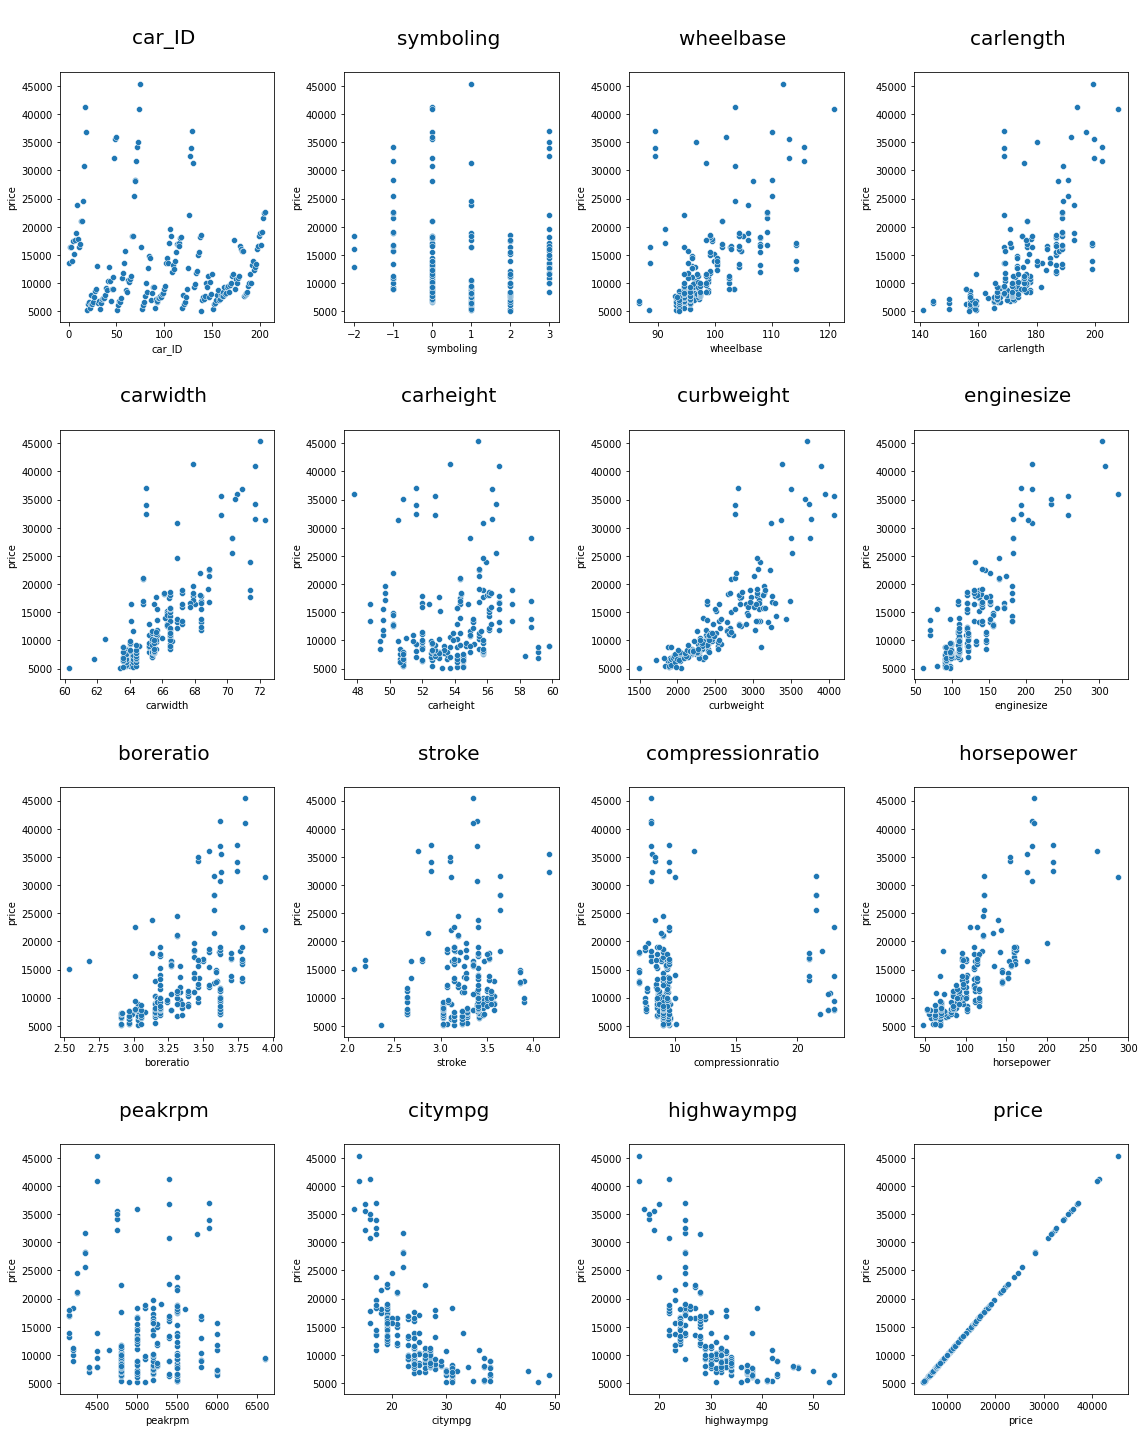

In [117]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <=16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.scatterplot(x = cols[i], y = df['price'], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        plotnumber+= 1
plt.tight_layout()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

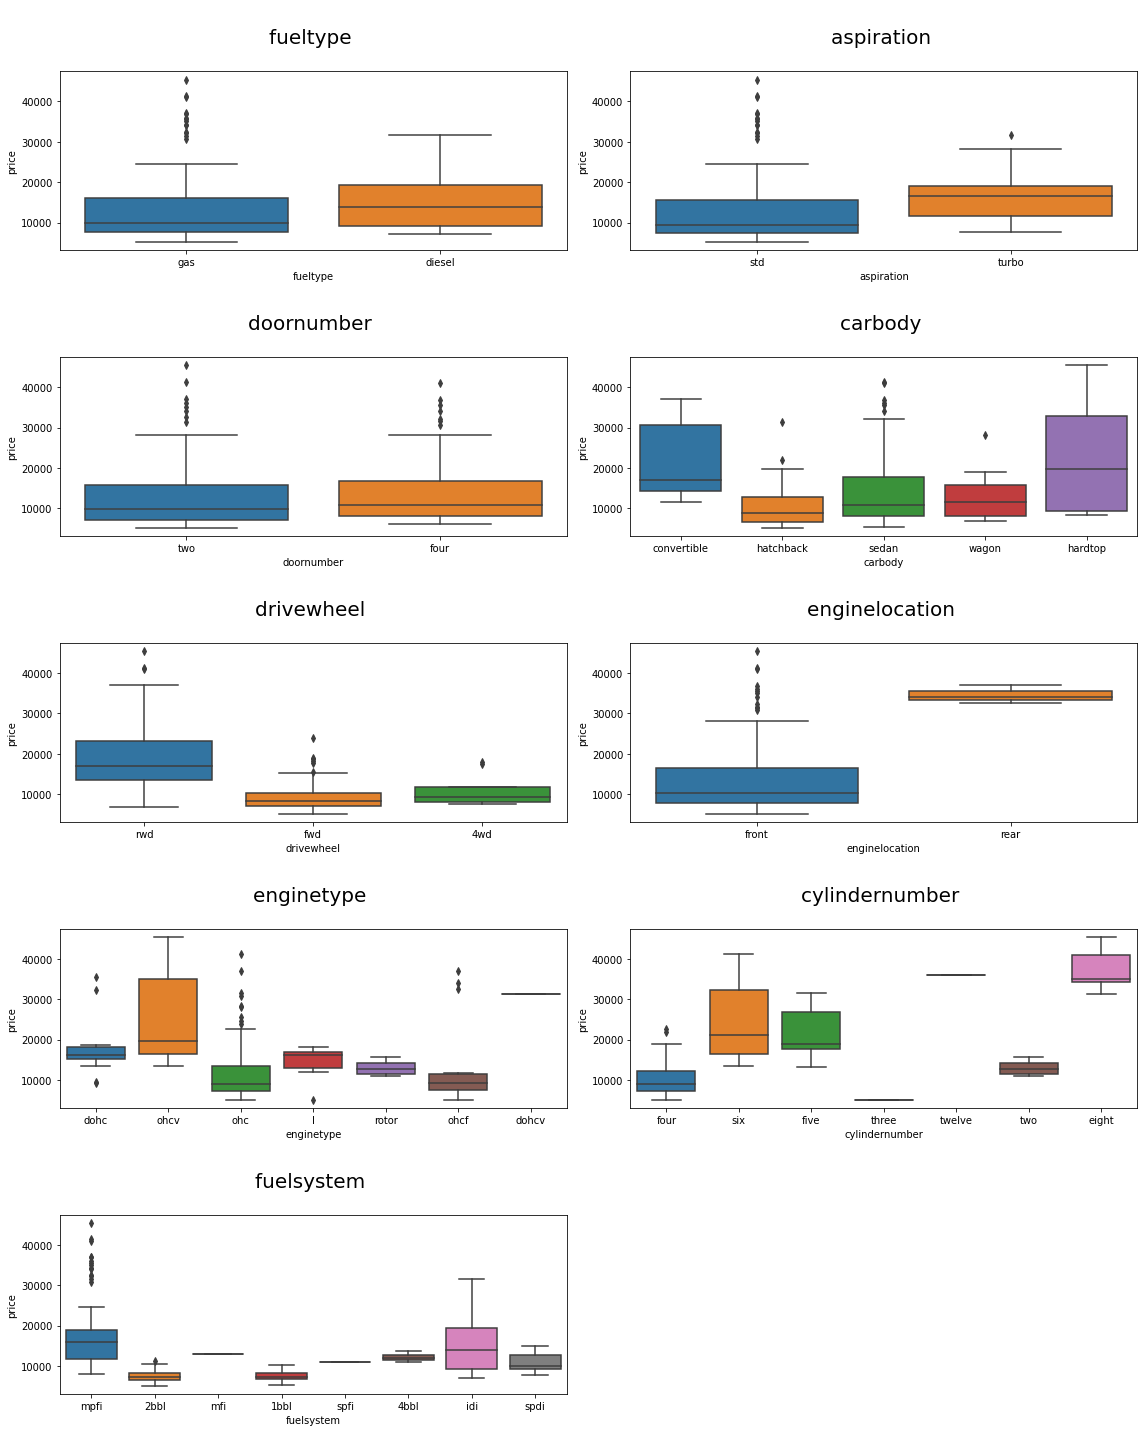

In [120]:
cols = cat_cols.columns

plt.figure(figsize=(16, 20))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(5, 2, plotnumber)
        sns.boxplot(x = cols[i], y = df['price'], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        plotnumber += 1
plt.tight_layout()

In [332]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [333]:
df['CarName'] = df['CarName'].str.split(" ", expand = True)[0]
df['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarName, dtype: int64

In [334]:
df['CarName'] = df['CarName'].replace({'toyouta': 'toyota', 'Nissan': 'nissan', 'maxda': 'mazda', 'vokswagen': 'volkswagen',
                                      'vw': 'volkswagen', 'porcshce': 'porsche'})
df['CarName'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarName, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

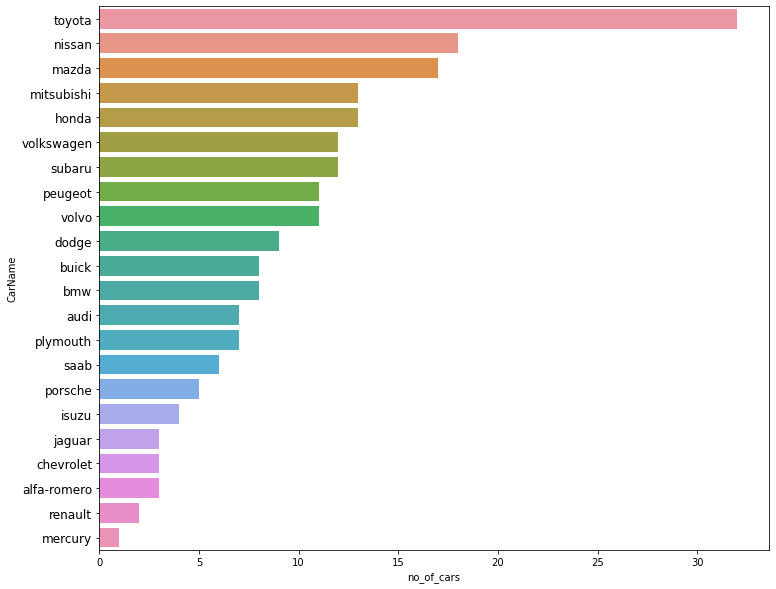

In [335]:
CarName = df['CarName'].value_counts().reset_index()
CarName.columns = ['CarName', 'no_of_cars']

plt.figure(figsize = (12, 10))
sns.barplot(x = 'no_of_cars', y = 'CarName', data = CarName)
plt.yticks(size = 12)
plt.show()

<IPython.core.display.Javascript object>

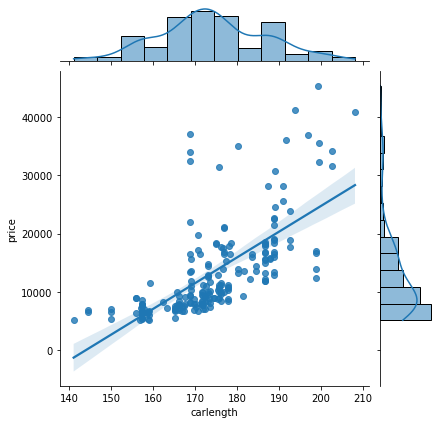

In [336]:
sns.jointplot(x = df['carlength'], y = df['price'], data = df, kind = 'reg')

In [337]:
px.scatter(data_frame = df, x = 'carlength', y = 'price', color = 'doornumber')

<IPython.core.display.Javascript object>

In [338]:
px.scatter(data_frame = df, x = 'carlength', y = 'price', color = 'carbody')

<IPython.core.display.Javascript object>

In [339]:
px.scatter(data_frame = df, x = 'carwidth', y = 'price', color = 'carbody')

<IPython.core.display.Javascript object>

## Data Processing

In [340]:
df.drop(columns = ['car_ID'], axis =1, inplace = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

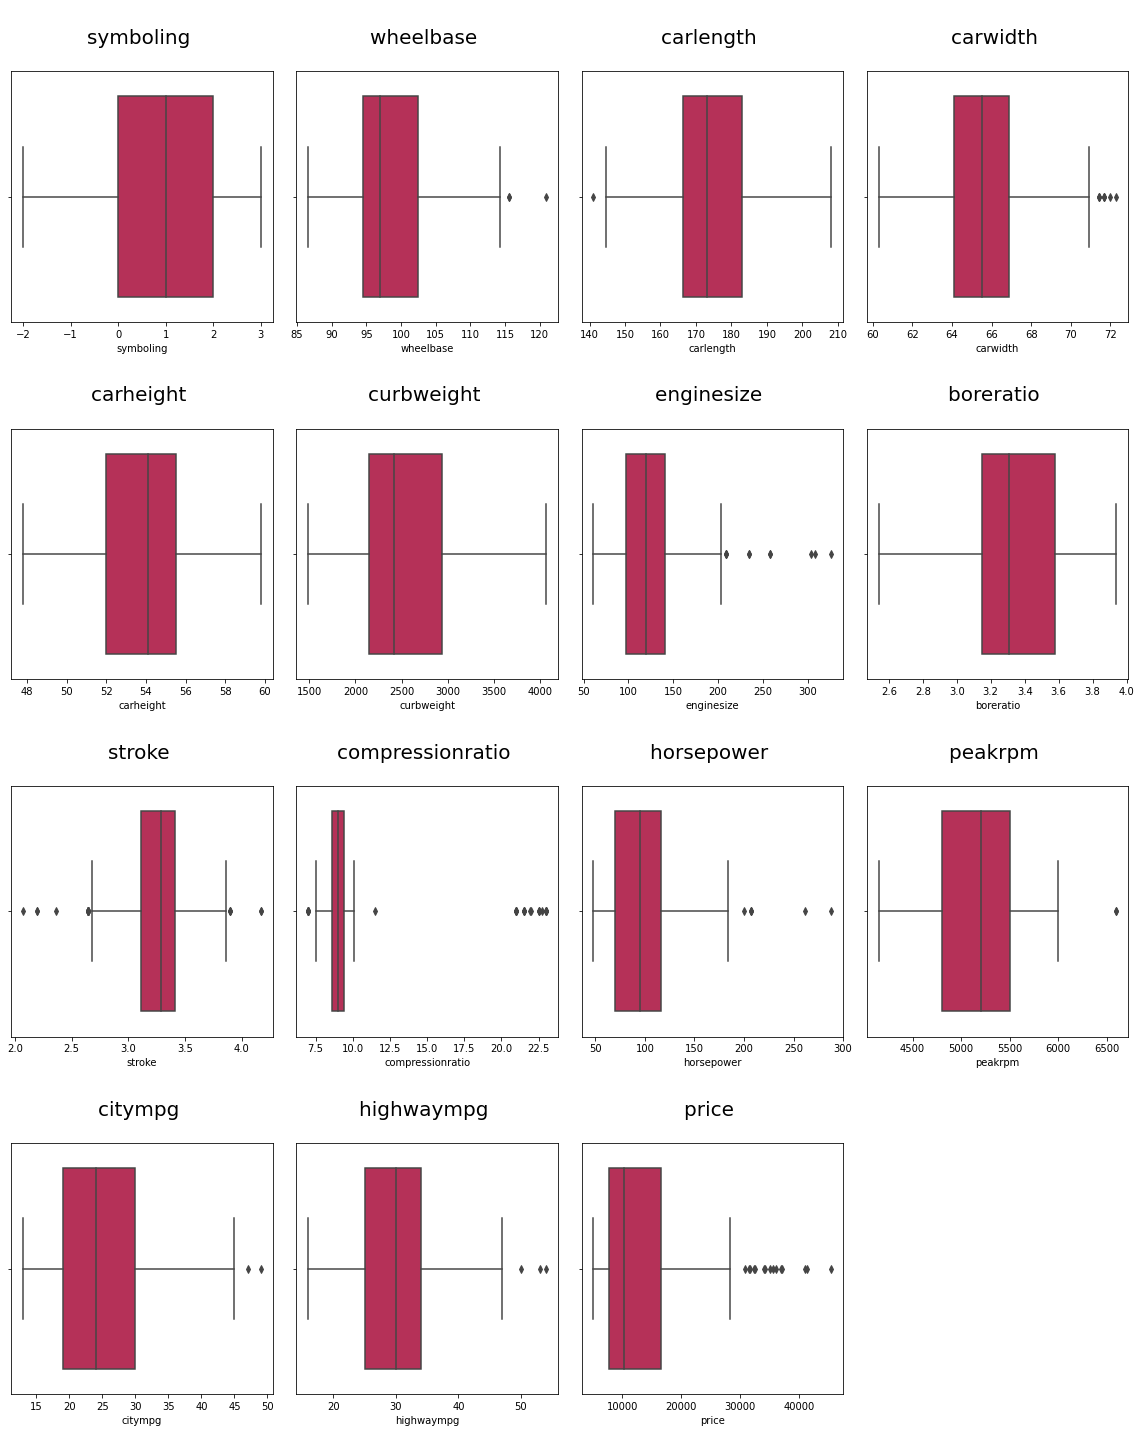

In [341]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(1, len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(x = cols[i], data = df, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [342]:
df['doornumber'] = df['doornumber'].map({'two':2, 'four': 4})
df['cylindernumber'] = df['cylindernumber'].map({'two':2, 'three':3, 'four': 4, 'five':5, 
                                                'six': 6, 'eight': 8, 'twelve': 12})

In [343]:
x = df.drop(columns = 'price', axis = 1)
y = df['price']

In [344]:
x = pd.get_dummies(x, drop_first = True)
x

<IPython.core.display.Javascript object>

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,1,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,...,0,0,0,0,0,0,0,1,0,0
201,-1,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,...,0,0,0,0,0,0,0,1,0,0
202,-1,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,...,0,1,0,0,0,0,0,1,0,0
203,-1,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,...,0,0,0,0,0,1,0,0,0,0


In [345]:
x['CarName_bmw']

0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    0
202    0
203    0
204    0
Name: CarName_bmw, Length: 205, dtype: uint8

## Linear Regression

In [346]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [347]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 

In [348]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [349]:
regressor.score(x_train, y_train)

0.9764533740023656

In [350]:
regressor.score(x_test, y_test)

0.8914450133126587

In [353]:
y_pred = regressor.predict(x_test)
y_pred

array([ 6812.68266656, 16387.79133141, 14154.86805016, -2174.96054741,
       10195.37370264, 11209.6801277 ,  6412.24865697,  5960.20232865,
       17015.5520515 ,  7881.01896092, 21118.13187398, 30925.30216101,
       13619.22973337, 13773.7296321 ,  8449.03795973, 10645.4731586 ,
       10778.63536878, 19030.66274793,  7718.35346941,  8105.52748756,
        9467.69894548, 15340.71484159, 11187.27690097, 11485.58385071,
       17929.91197357,  6782.86771232,  7734.27149496, 15744.25869767,
        7565.23439467,  5865.53763957,  8700.77632167, 11055.74709619,
       23930.90900472,  9515.29140169,  7299.91601196, 29179.2348046 ,
       14166.82008837, 14755.68827404,  5015.55543356, 35929.30000626,
        7305.07651223, 16552.09929798, 32876.78052298, 19981.59689325,
       11574.16118758,  7558.24254986,  7089.52697743, 13292.12435944,
       11057.0499324 , 10222.7736006 , 21780.69261616,  6439.48897984,
        6889.74818986,  9774.62998948, 17902.79516856, 18044.80854079,
      

## Lasso Regression

In [368]:
from sklearn.linear_model import Lasso, LassoCV

Lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
Lassocv.fit(x_train, y_train)

C:\Users\Om Singh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 



LassoCV(cv=10, max_iter=10000, normalize=True)

In [369]:
lasso = Lasso(alpha = Lassocv.alpha_)
lasso.fit(x_train, y_train)

Lasso(alpha=1.0584027183895213)

In [370]:
lasso.score(x_train, y_train)

0.9764068201184679

In [371]:
lasso.score(x_test, y_test)

0.8490211917169965